In [5]:
import matplotlib

import datetime
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
mpl.rcParams['figure.dpi'] = 300

In [7]:
JOB_DATA_FILE='jobs-2019-11-11.txt'

In [8]:
df = pd.read_csv(JOB_DATA_FILE, sep='|')

In [9]:
df.head()

,JobID,Account,Submit,Start,End,NNodes,State,QOS,Partition
0,1301523,co_rosalind,2017-04-25T11:24:01,Unknown,Unknown,1,PENDING,savio_lowprio,savio_bigmem
1,1558831,fc_zingiber,2017-07-18T12:52:41,Unknown,Unknown,1,PENDING,savio_normal,savio
2,1558836,fc_zingiber,2017-07-18T12:54:45,Unknown,Unknown,1,PENDING,savio_normal,savio
3,1560071,fc_zingiber,2017-07-18T21:30:01,Unknown,Unknown,1,PENDING,savio_normal,savio
4,3058499,fc_drought,2018-06-01T16:41:27,Unknown,Unknown,1,PENDING,savio_normal,savio2


In [10]:
df = df[df.Start != 'Unknown']
df = df[df.End   != 'Unknown']
df = df[df.JobID.str[-6] != '.batch']

In [11]:
df.head()


,JobID,Account,Submit,Start,End,NNodes,State,QOS,Partition
18,4418950,fc_surfwill,2019-06-06T08:40:53,2019-12-06T12:38:40,2019-12-06T12:49:31,1,OUT_OF_MEMORY,savio_normal,savio
19,4418950.batch,fc_surfwill,2019-12-06T12:38:40,2019-12-06T12:38:40,2019-12-06T12:49:31,1,OUT_OF_MEMORY,NaN,NaN
20,4419029,fc_surfwill,2019-06-06T08:48:42,2019-12-06T12:38:40,2019-12-06T12:48:27,1,OUT_OF_MEMORY,savio_normal,savio
21,4419029.batch,fc_surfwill,2019-12-06T12:38:40,2019-12-06T12:38:40,2019-12-06T12:48:27,1,OUT_OF_MEMORY,NaN,NaN
32,5151447,co_rosalind,2019-10-29T11:44:12,2019-10-29T11:44:13,2019-11-22T10:44:39,1,TIMEOUT,rosalind_htc2_normal,savio2_htc


In [12]:
df['Start']  = pd.to_datetime(df.Start)
df['End']    = pd.to_datetime(df.End)
df['Submit'] = pd.to_datetime(df.Submit)
df['Wait']   = df.Start - df.Submit
df['Wait_min']   = df['Wait'] / np.timedelta64(1,'m')
df['Wait_hours'] = df['Wait'] / np.timedelta64(1,'h')
df.index = df.Submit
df = df.sort_index()


In [13]:
df.head()

,JobID,Account,Submit,Start,End,NNodes,State,QOS,Partition,Wait,Wait_min,Wait_hours
Submit,,,,,,,,,,,,
2019-06-06 08:40:53,4418950,fc_surfwill,2019-06-06 08:40:53,2019-12-06 12:38:40,2019-12-06 12:49:31,1,OUT_OF_MEMORY,savio_normal,savio,183 days 03:57:47,263757.783333,4395.963056
2019-06-06 08:48:42,4419029,fc_surfwill,2019-06-06 08:48:42,2019-12-06 12:38:40,2019-12-06 12:48:27,1,OUT_OF_MEMORY,savio_normal,savio,183 days 03:49:58,263749.966667,4395.832778
2019-10-29 11:44:12,5151447,co_rosalind,2019-10-29 11:44:12,2019-10-29 11:44:13,2019-11-22 10:44:39,1,TIMEOUT,rosalind_htc2_normal,savio2_htc,0 days 00:00:01,0.016667,0.000278
2019-10-29 11:44:13,5151447.0,co_rosalind,2019-10-29 11:44:13,2019-10-29 11:44:13,2019-11-22 10:44:42,1,CANCELLED,NaN,NaN,0 days 00:00:00,0.000000,0.000000
2019-10-29 11:44:13,5151447.batch,co_rosalind,2019-10-29 11:44:13,2019-10-29 11:44:13,2019-11-22 10:44:41,1,CANCELLED,NaN,NaN,0 days 00:00:00,0.000000,0.000000


In [ ]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html


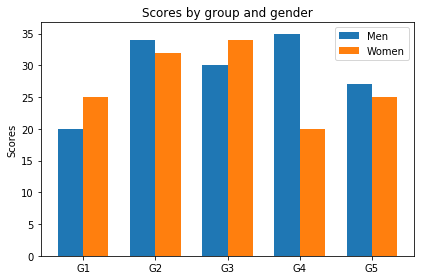

In [15]:
#https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



fig.tight_layout()

plt.show()

In [66]:
#grouped = df.groupby('Partition')
grouped = 1

NameError: name 'show' is not defined

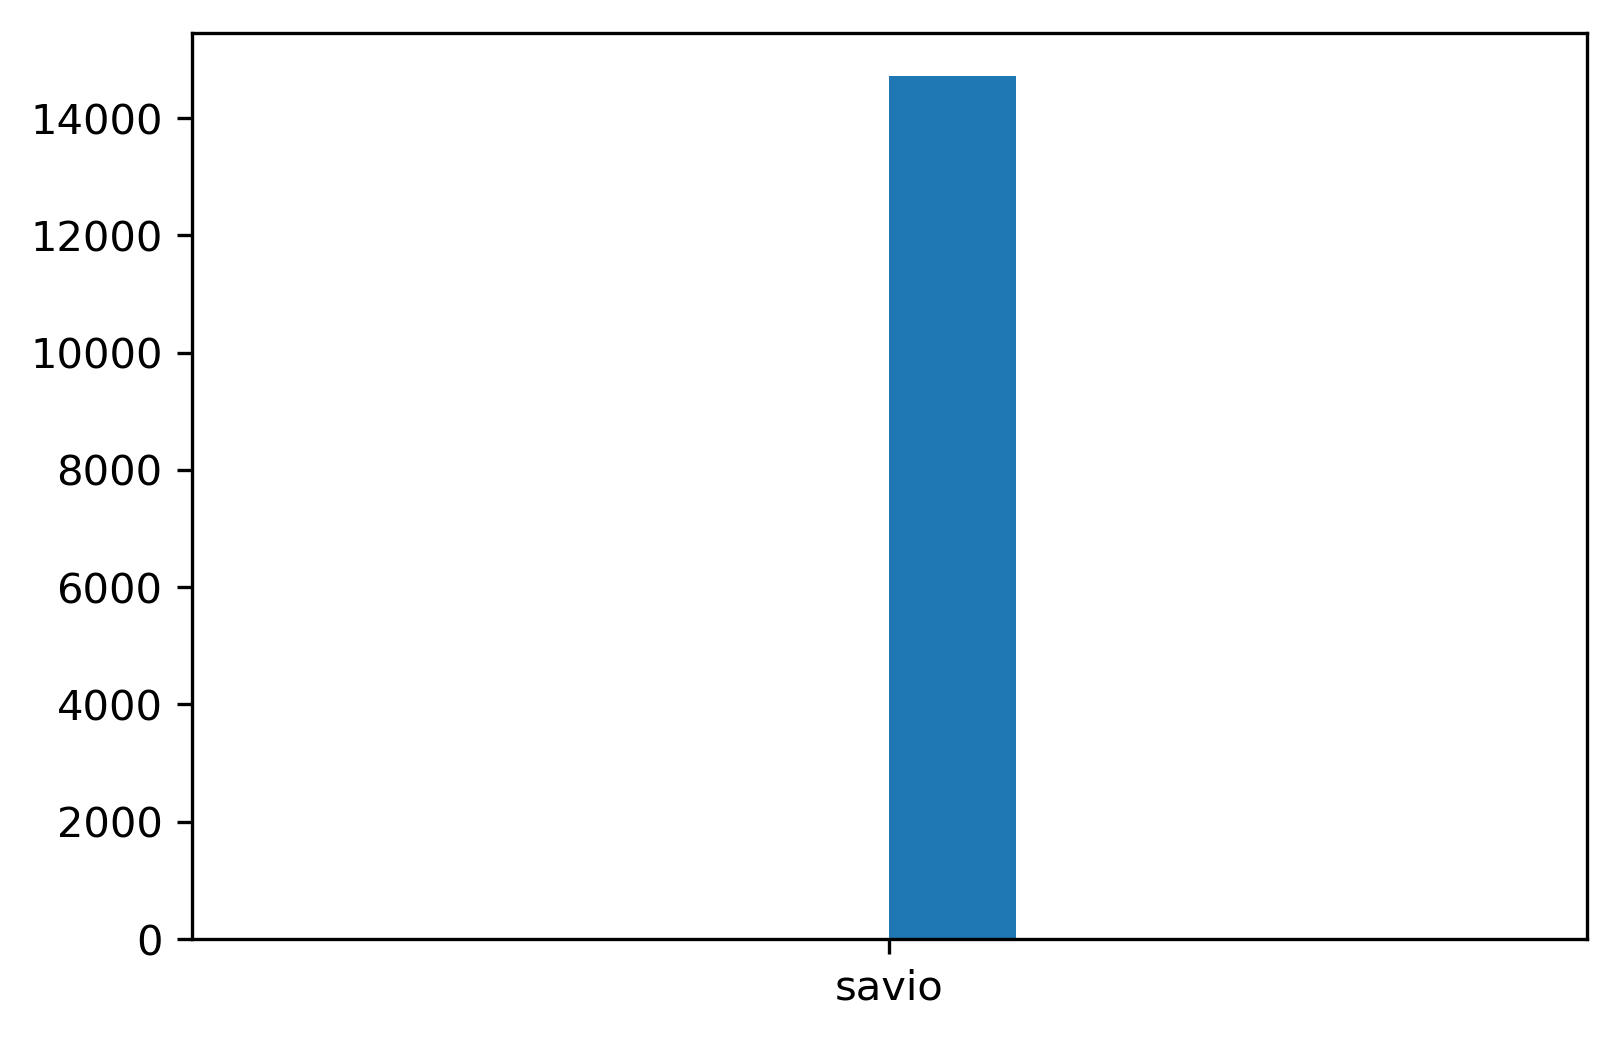

In [40]:
for group in grouped:
    #figure()
    #matplotlib.pyplot.hist(group[1].N)
    mpl.pyplot.hist(group[1].Partition)
    show()

In [67]:
df.head()

,JobID,Account,Submit,Start,End,NNodes,State,QOS,Partition,Wait,Wait_min,Wait_hours
Submit,,,,,,,,,,,,
2019-06-06 08:40:53,4418950,fc_surfwill,2019-06-06 08:40:53,2019-12-06 12:38:40,2019-12-06 12:49:31,1,OUT_OF_MEMORY,savio_normal,savio,183 days 03:57:47,263757.783333,4395.963056
2019-06-06 08:48:42,4419029,fc_surfwill,2019-06-06 08:48:42,2019-12-06 12:38:40,2019-12-06 12:48:27,1,OUT_OF_MEMORY,savio_normal,savio,183 days 03:49:58,263749.966667,4395.832778
2019-10-29 11:44:12,5151447,co_rosalind,2019-10-29 11:44:12,2019-10-29 11:44:13,2019-11-22 10:44:39,1,TIMEOUT,rosalind_htc2_normal,savio2_htc,0 days 00:00:01,0.016667,0.000278
2019-10-29 11:44:13,5151447.0,co_rosalind,2019-10-29 11:44:13,2019-10-29 11:44:13,2019-11-22 10:44:42,1,CANCELLED,NaN,NaN,0 days 00:00:00,0.000000,0.000000
2019-10-29 11:44:13,5151447.batch,co_rosalind,2019-10-29 11:44:13,2019-10-29 11:44:13,2019-11-22 10:44:41,1,CANCELLED,NaN,NaN,0 days 00:00:00,0.000000,0.000000


In [68]:
# select partition (tmp)
#df = df[ df['Partition'] == 'savio']
#df = df[ df['Partition'] == 'savio2']

Queue: savio
Queue: savio2
Queue: savio2_knl
Queue: savio2_htc
Queue: savio3


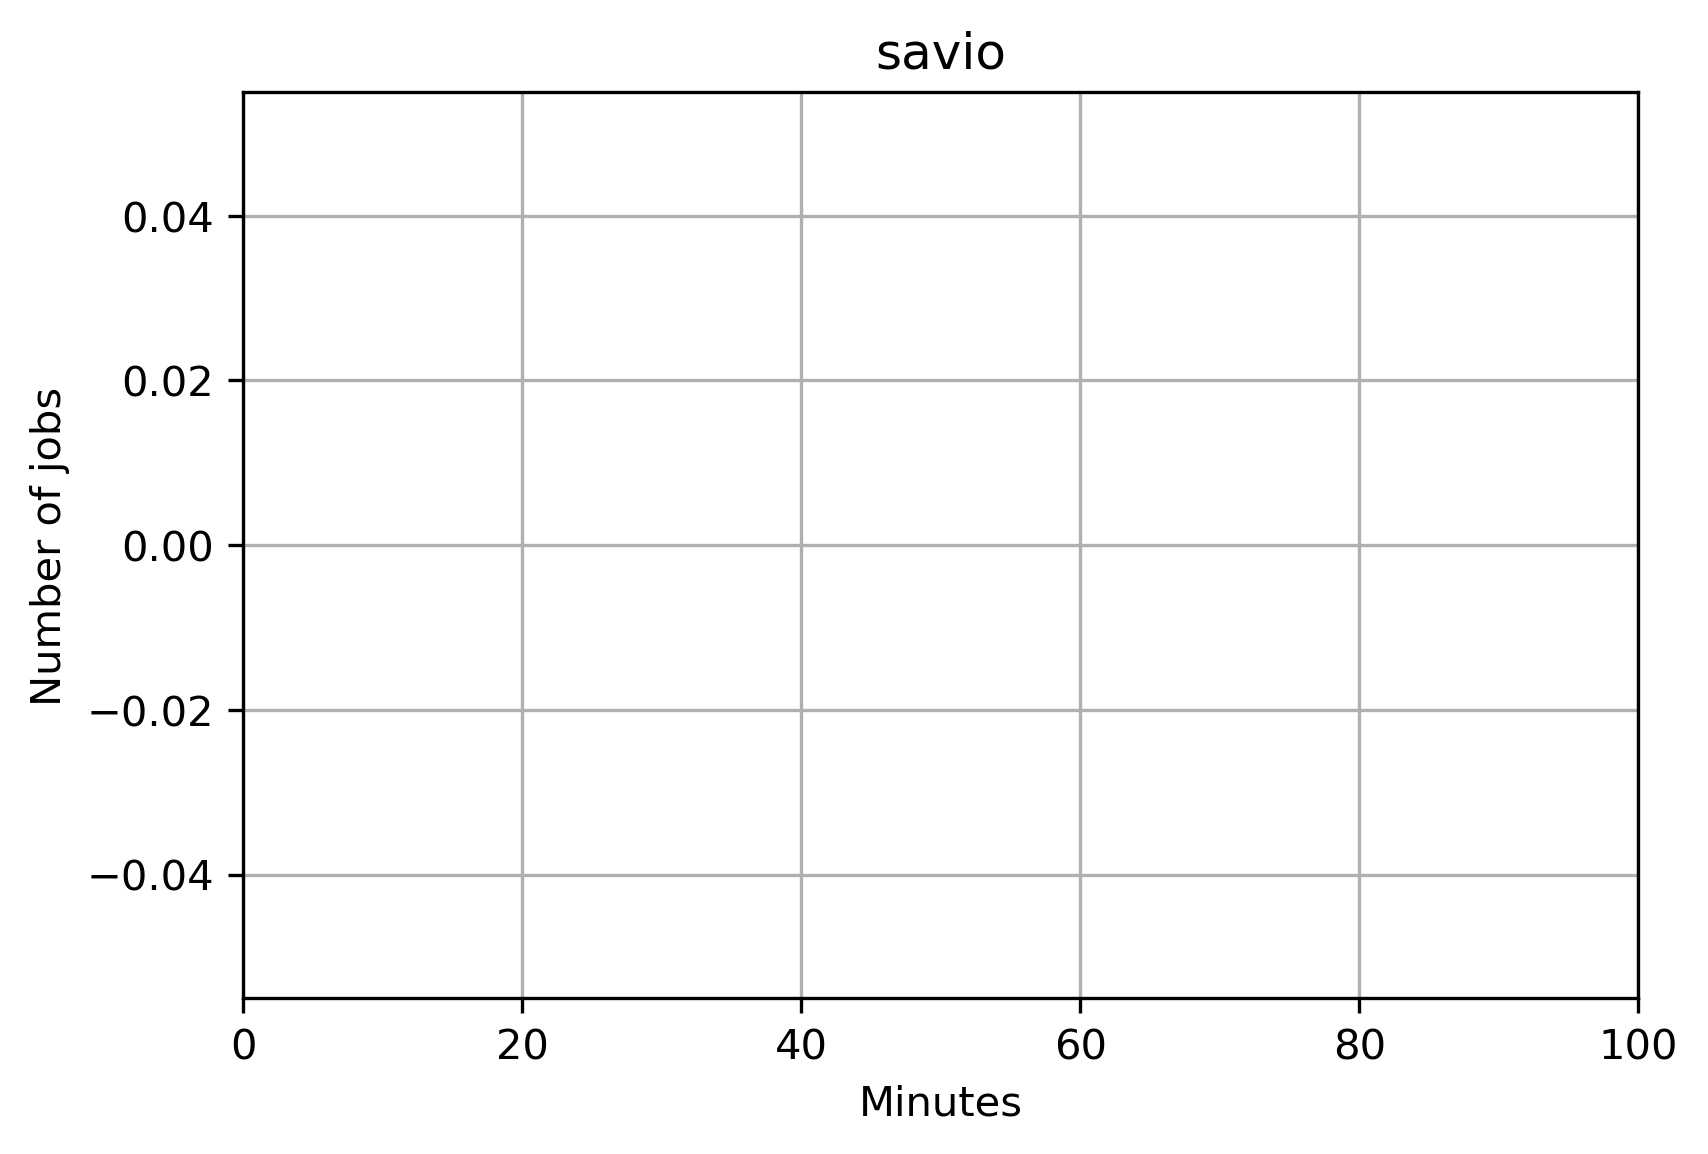

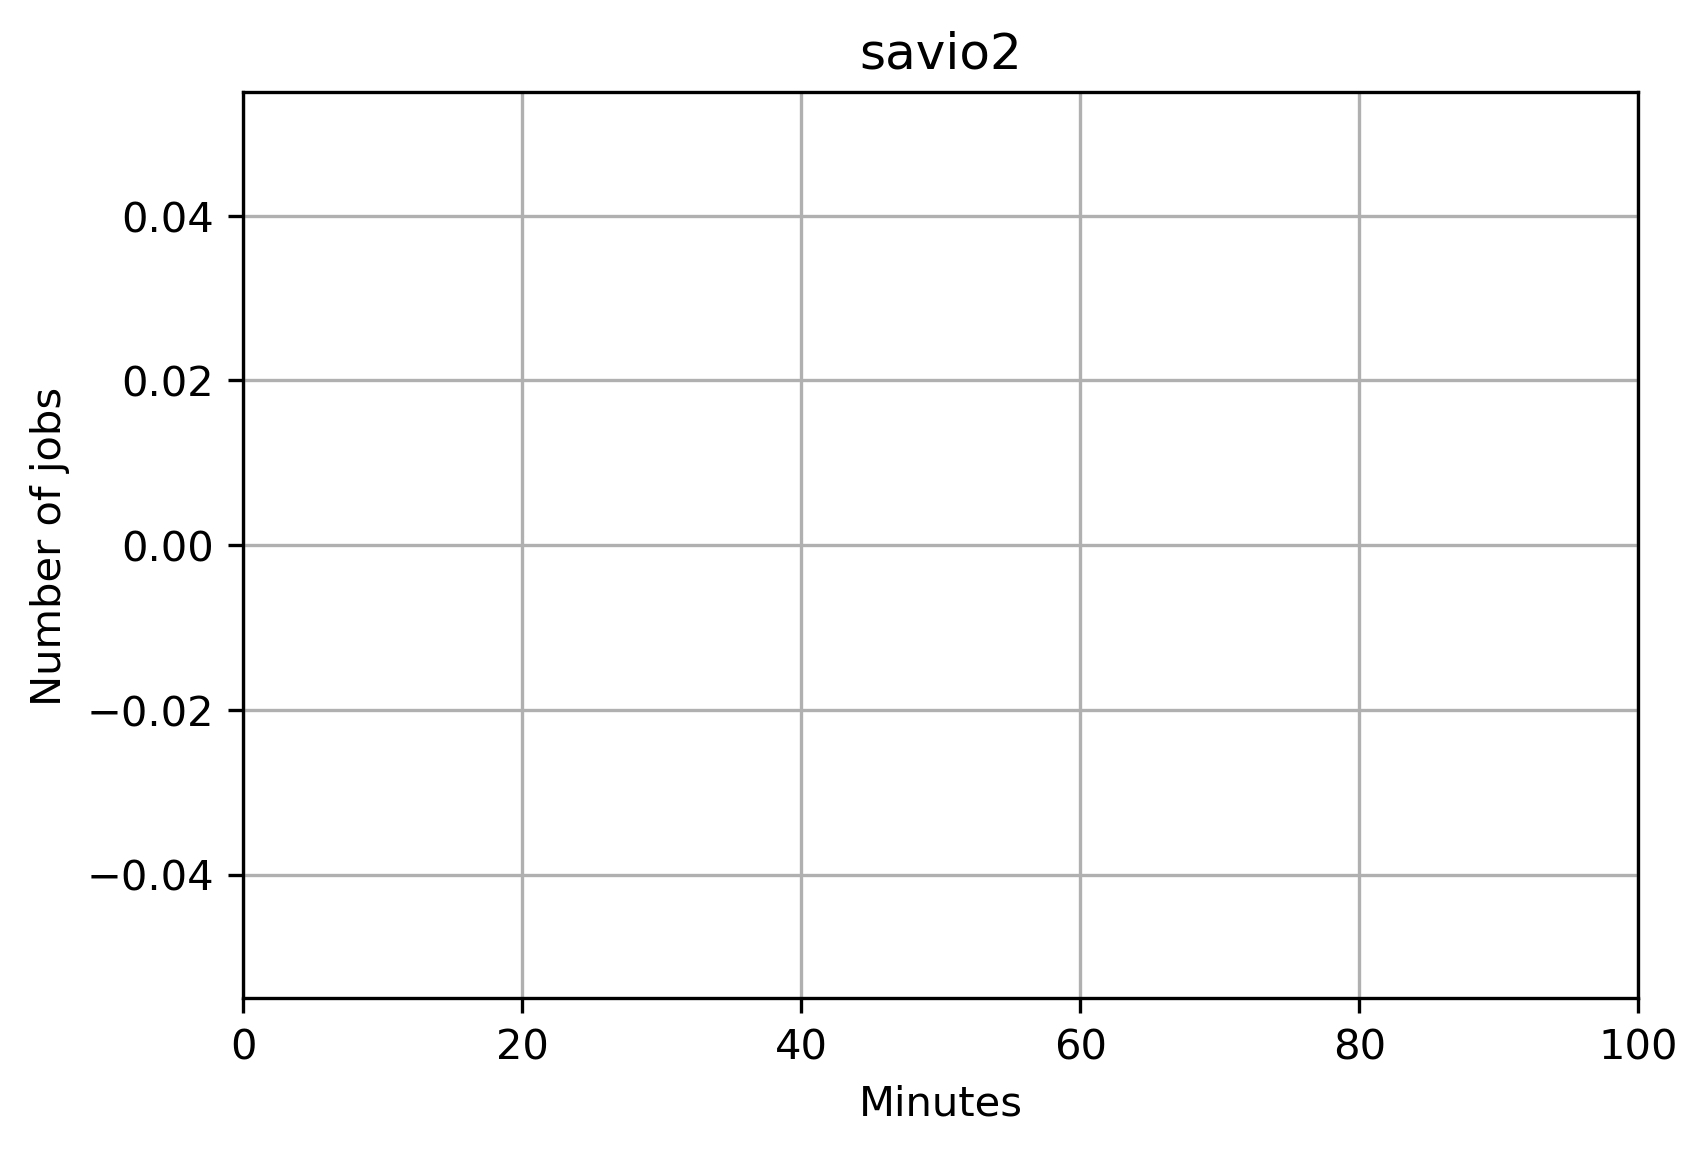

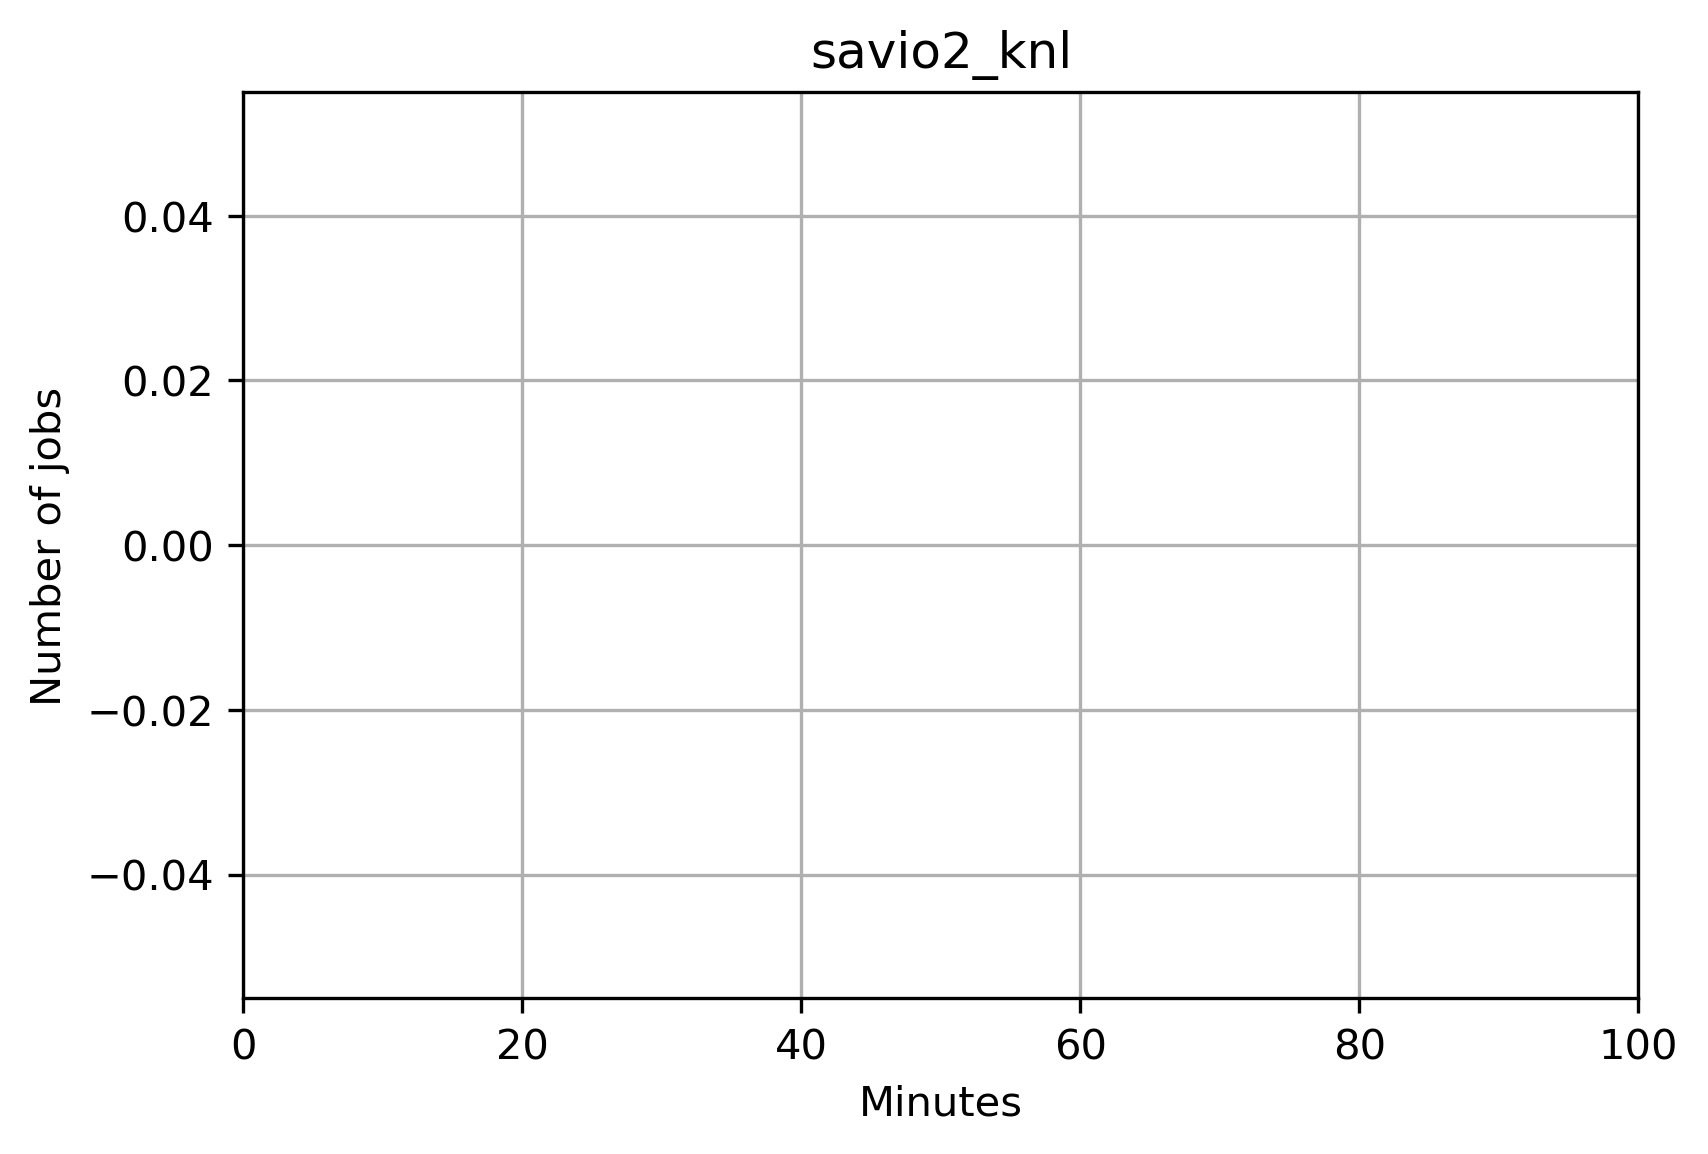

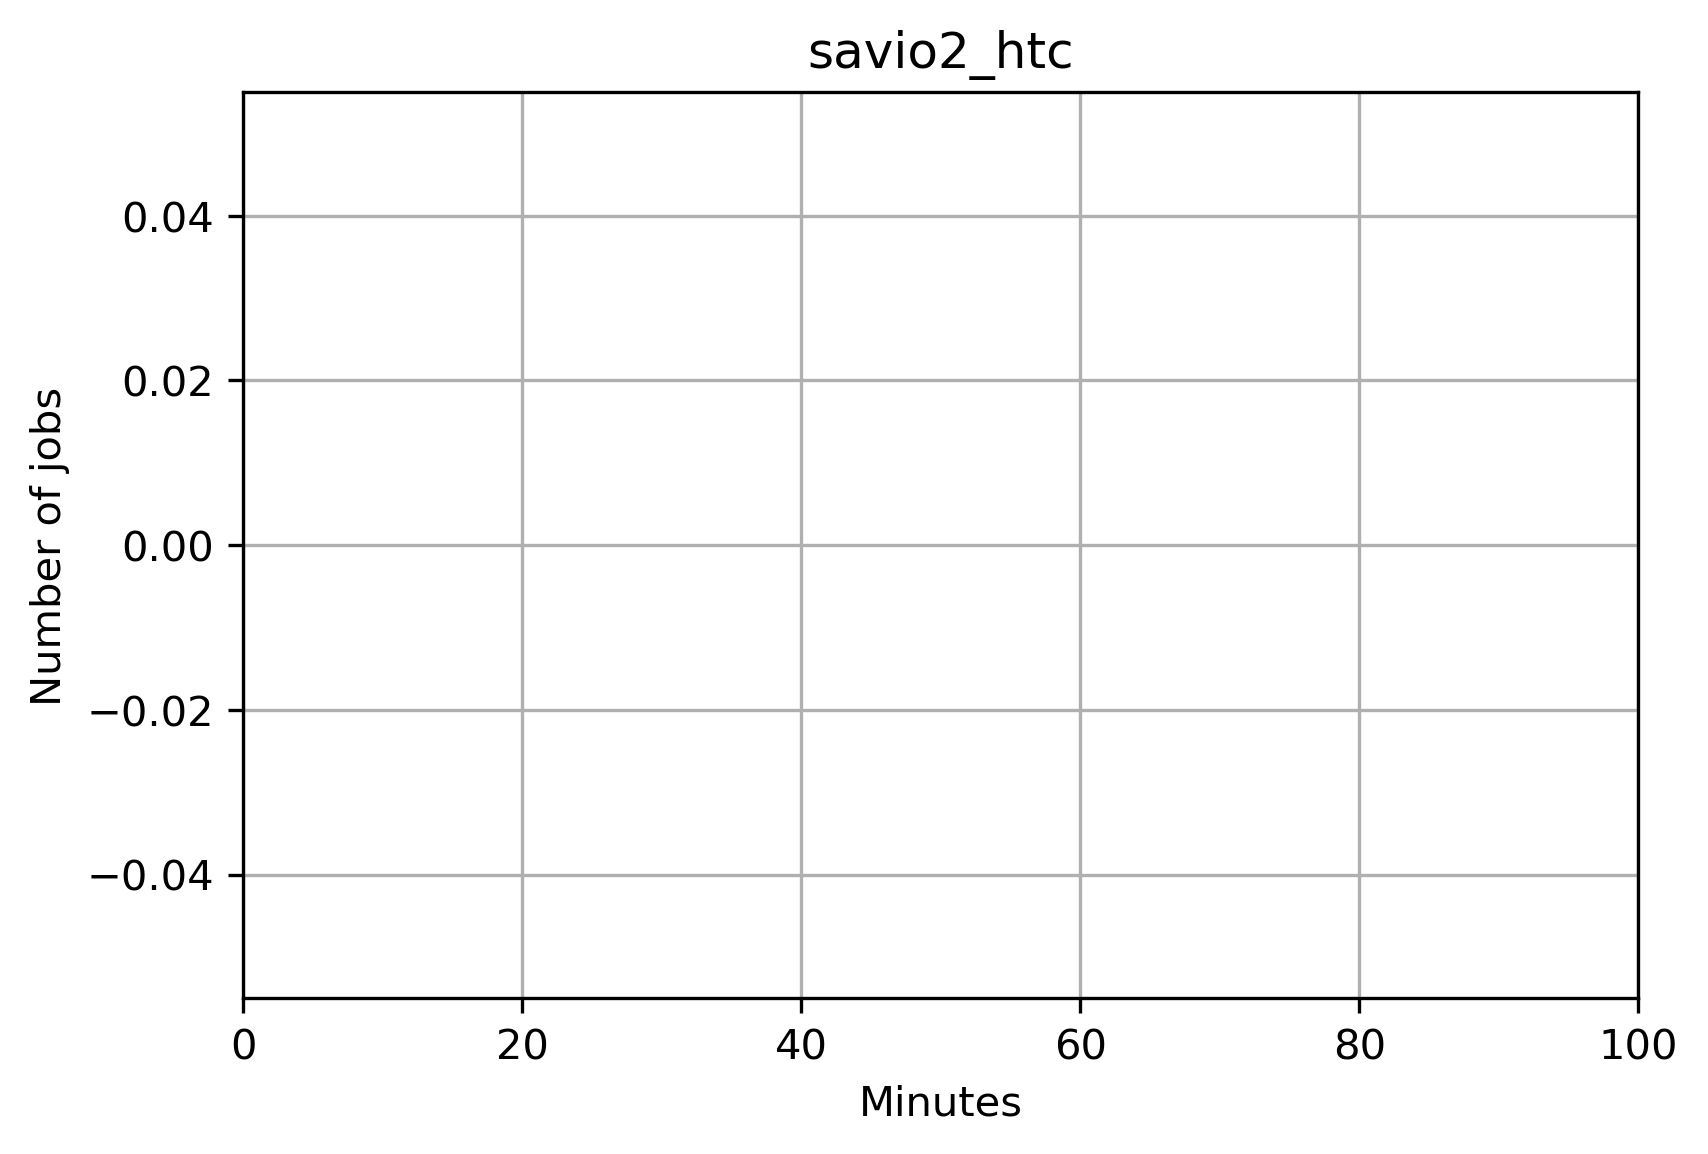

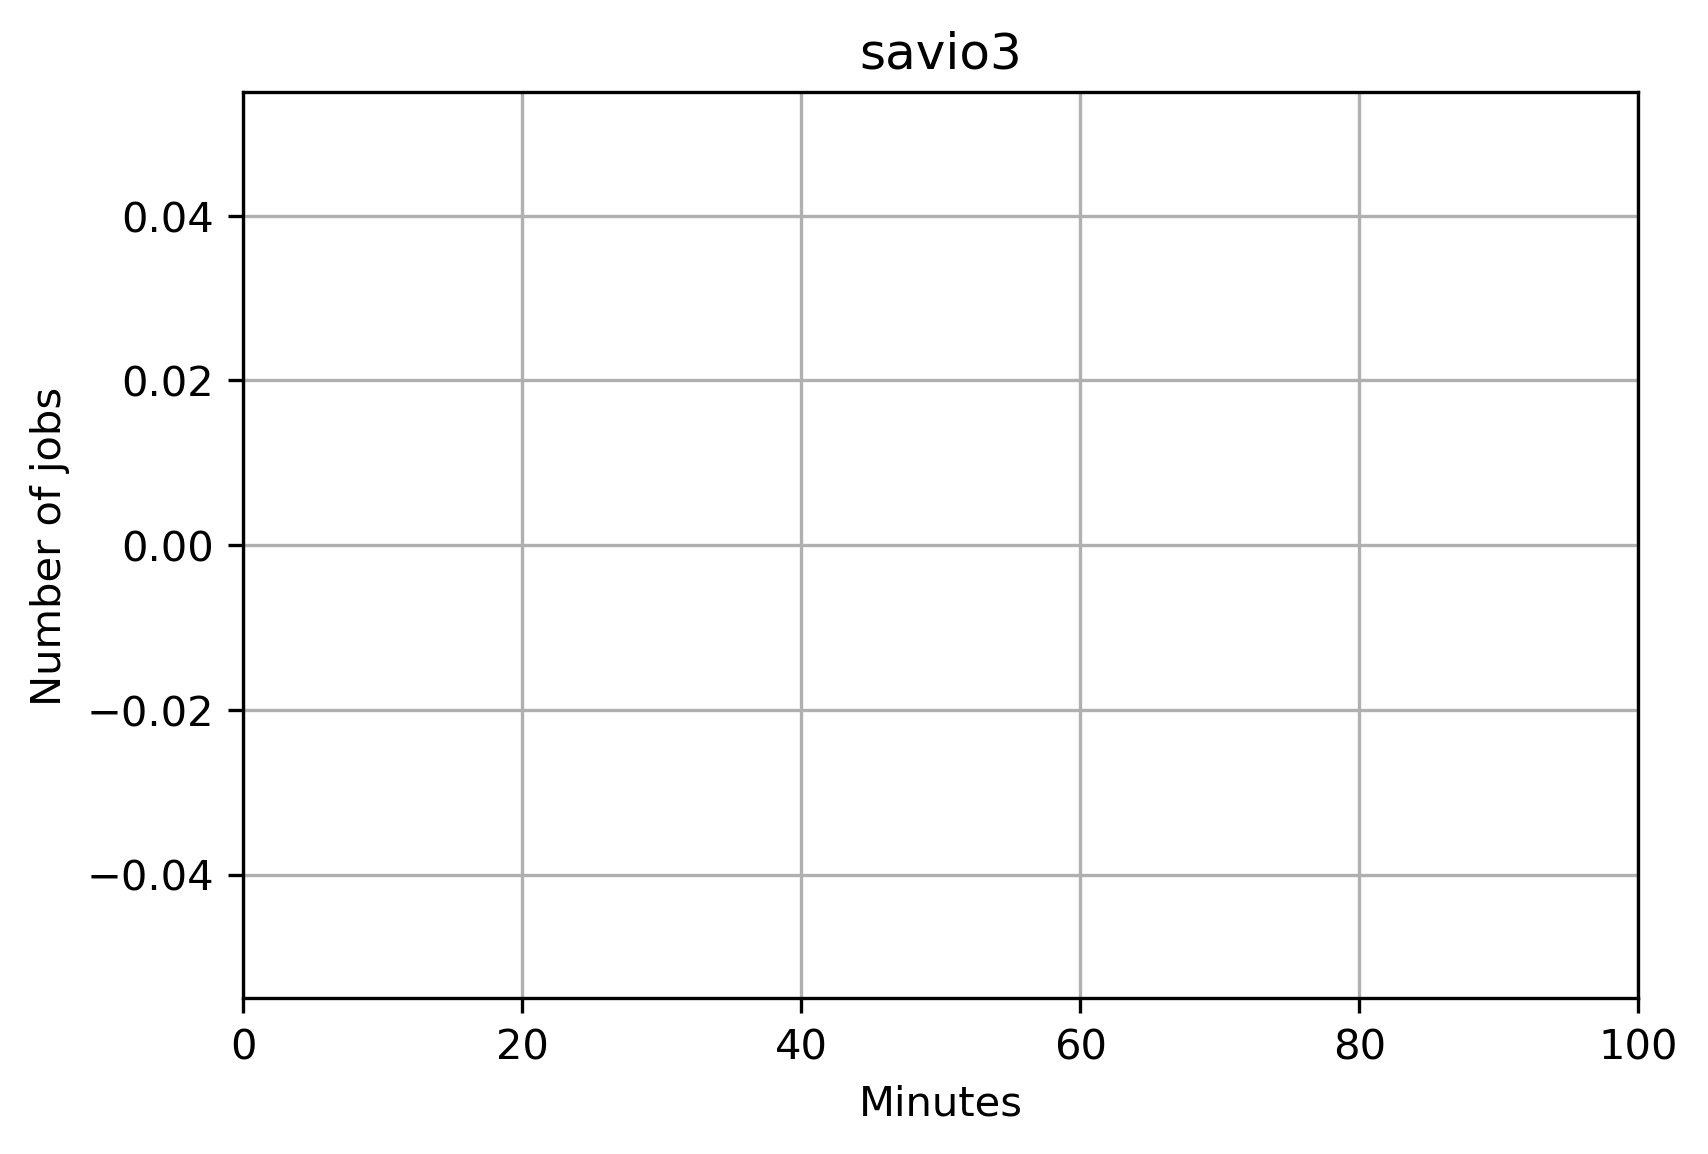

In [81]:
for PRT in ['savio', 'savio2', 'savio2_knl', 'savio2_htc', 'savio3'] :
    print( "Queue: " + PRT )
    df = df[ df['Partition'] == PRT ]
    _, ax = plt.subplots()
    df['Wait_min'].hist(ax=ax,bins=[5* x for x in range(100)])
    #df['Wait_min'].hist(ax=ax,bins=[5* x for x in range(100)],by=df['Partition'])
    #df['Wait_min'].hist(bins=[5* x for x in range(100)],by=df['Partition'])
    #ax.set_title('Queue wait time 2019-11-11 to 2019-12-11')
    ax.set_title( PRT )
    ax.set_ylabel('Number of jobs')
    ax.set_xlabel('Minutes')
    ax.set_xlim([0,100])

In [79]:
df.head()

,JobID,Account,Submit,Start,End,NNodes,State,QOS,Partition,Wait,Wait_min,Wait_hours
Submit,,,,,,,,,,,,
2019-06-06 08:40:53,4418950,fc_surfwill,2019-06-06 08:40:53,2019-12-06 12:38:40,2019-12-06 12:49:31,1,OUT_OF_MEMORY,savio_normal,savio,183 days 03:57:47,263757.783333,4395.963056
2019-06-06 08:48:42,4419029,fc_surfwill,2019-06-06 08:48:42,2019-12-06 12:38:40,2019-12-06 12:48:27,1,OUT_OF_MEMORY,savio_normal,savio,183 days 03:49:58,263749.966667,4395.832778
2019-11-04 18:00:51,5166405,co_nuclear,2019-11-04 18:00:51,2019-11-04 18:00:51,2019-11-13 05:12:08,1,CANCELLED by 43962,nuclear_savio_normal,savio,0 days 00:00:00,0.000000,0.000000
2019-11-07 11:46:20,5177904,co_nuclear,2019-11-07 11:46:20,2019-11-07 11:46:20,2019-11-13 07:23:30,1,COMPLETED,nuclear_savio_normal,savio,0 days 00:00:00,0.000000,0.000000
2019-11-08 14:31:38,5180324,ac_nucmat,2019-11-08 14:31:38,2019-11-08 14:31:41,2019-11-11 14:31:57,1,TIMEOUT,savio_normal,savio,0 days 00:00:03,0.050000,0.000833


Queue: savio2_htc


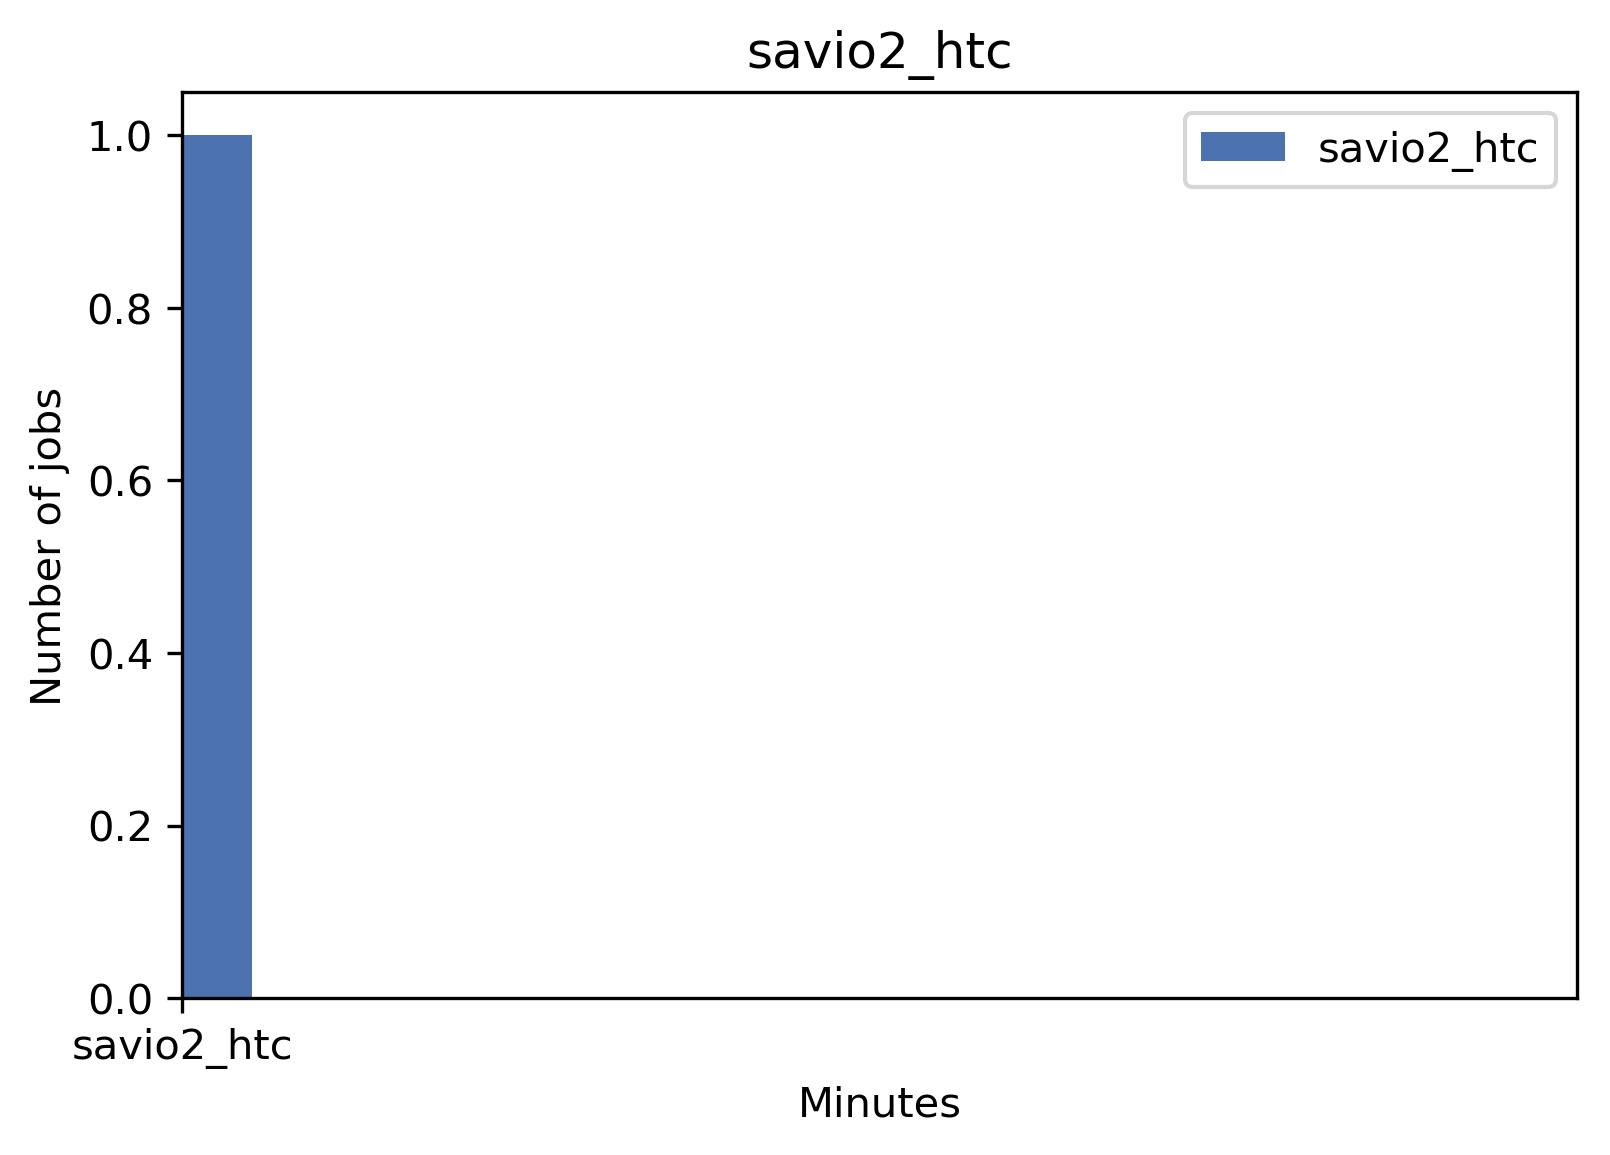

In [96]:
plt.style.use('seaborn-deep')
#for PRT in ['savio', 'savio2', 'savio2_knl', 'savio2_htc', 'savio3'] :
#for PRT in ['savio2_htc', 'savio3' ] :
for PRT in ['savio2_htc' ] :   
    print( "Queue: " + PRT )
    #df = df[ df['Partition'] == PRT]
    _, ax = plt.subplots()
    plt.hist(PRT,bins=[5* x for x in range(100)],label=PRT)
    plt.legend(loc='upper right')
    
    #df['Wait_min'].hist(ax=ax,bins=[5* x for x in range(100)])
    #df['Wait_min'].hist(ax=ax,bins=[5* x for x in range(100)],by=df['Partition'])
    #df['Wait_min'].hist(bins=[5* x for x in range(100)],by=df['Partition'])
    #ax.set_title('Queue wait time 2019-11-11 to 2019-12-11')
    ax.set_title( PRT )
    ax.set_ylabel('Number of jobs')
    ax.set_xlabel('Minutes')
    ax.set_xlim([0,100])
    plt.show()

In [97]:
hist(ax=ax,bins=[5* x for x in range(100)])
